# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [4]:
# Common library imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Data Pre-Processing:

For data pre-precessing I initially just read the questions from the file and define an array for each of the party colors, so I can properly use the party colors during later analysis.

In [5]:
# Data pre-processing
## We base our pre-processing on the raw alldata.xlsx information, which includes a complete overview of all the responses associated with each candidate and party affiliation.
raw_data = pd.read_excel('alldata.xlsx')

## Display the head of the raw data, for visual inspection:
display(raw_data.head())

## Since it is a requirement that each party have a specific color, I create a dictionary here, with these colors defined:
party_colors = {
    "Socialdemokratiet": "#b32722",
    "Radikale Venstre": "#713280",
    "Det Konservative Folkeparti": "#9eba27",
    "Nye Borgerlige": "#054f5c",
    "Socialistisk Folkeparti": "#dd0878",
    "Liberal Alliance": "#21c6cf",
    "Kristendemokraterne": "#bababa",
    "Moderaterne": "#6c39e5",
    "Dansk Folkeparti": "#f3cd41",
    "Frie Grønne, Danmarks Nye Venstrefløjsparti": "#00e66a",
    "Venstre": "#006697",
    "Danmarksdemokraterne": "#8ac3ff",
    "Enhedslisten": "#ed8019",
    "Alternativet": "#2a8f39",
    "Løsgænger": "#8c564b"
}

,530,531,533,534,535,537,538,540,541,543,...,9a,9b,10a,10b,11a,11b,12a,12b,storkreds,alder
0,-1,-2,1,-2,2,1,-2,1,1,2,...,2,0,1,-2,-2,1,1,1,Københavns Storkreds,78
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,-2,0,-1,2,1,-2,0,0,Fyns Storkreds,64
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,-1,-2,0,2,0,-1,1,-2,Bornholms Storkreds,37
3,2,1,-2,-1,1,1,1,1,1,-2,...,-2,2,2,2,2,-1,2,0,Nordjyllands Storkreds,28
4,1,1,-2,2,-2,1,-2,1,2,-2,...,-2,0,-1,0,-2,0,2,-2,Københavns Storkreds,58


# Data Analysis: Which questions are most crucial concerning their placement on the axes.

# Data Analysis: Average positions of parties concerning each question, preferably with accompanying plots of each question.


Candidate Average Responses visualized for each party:


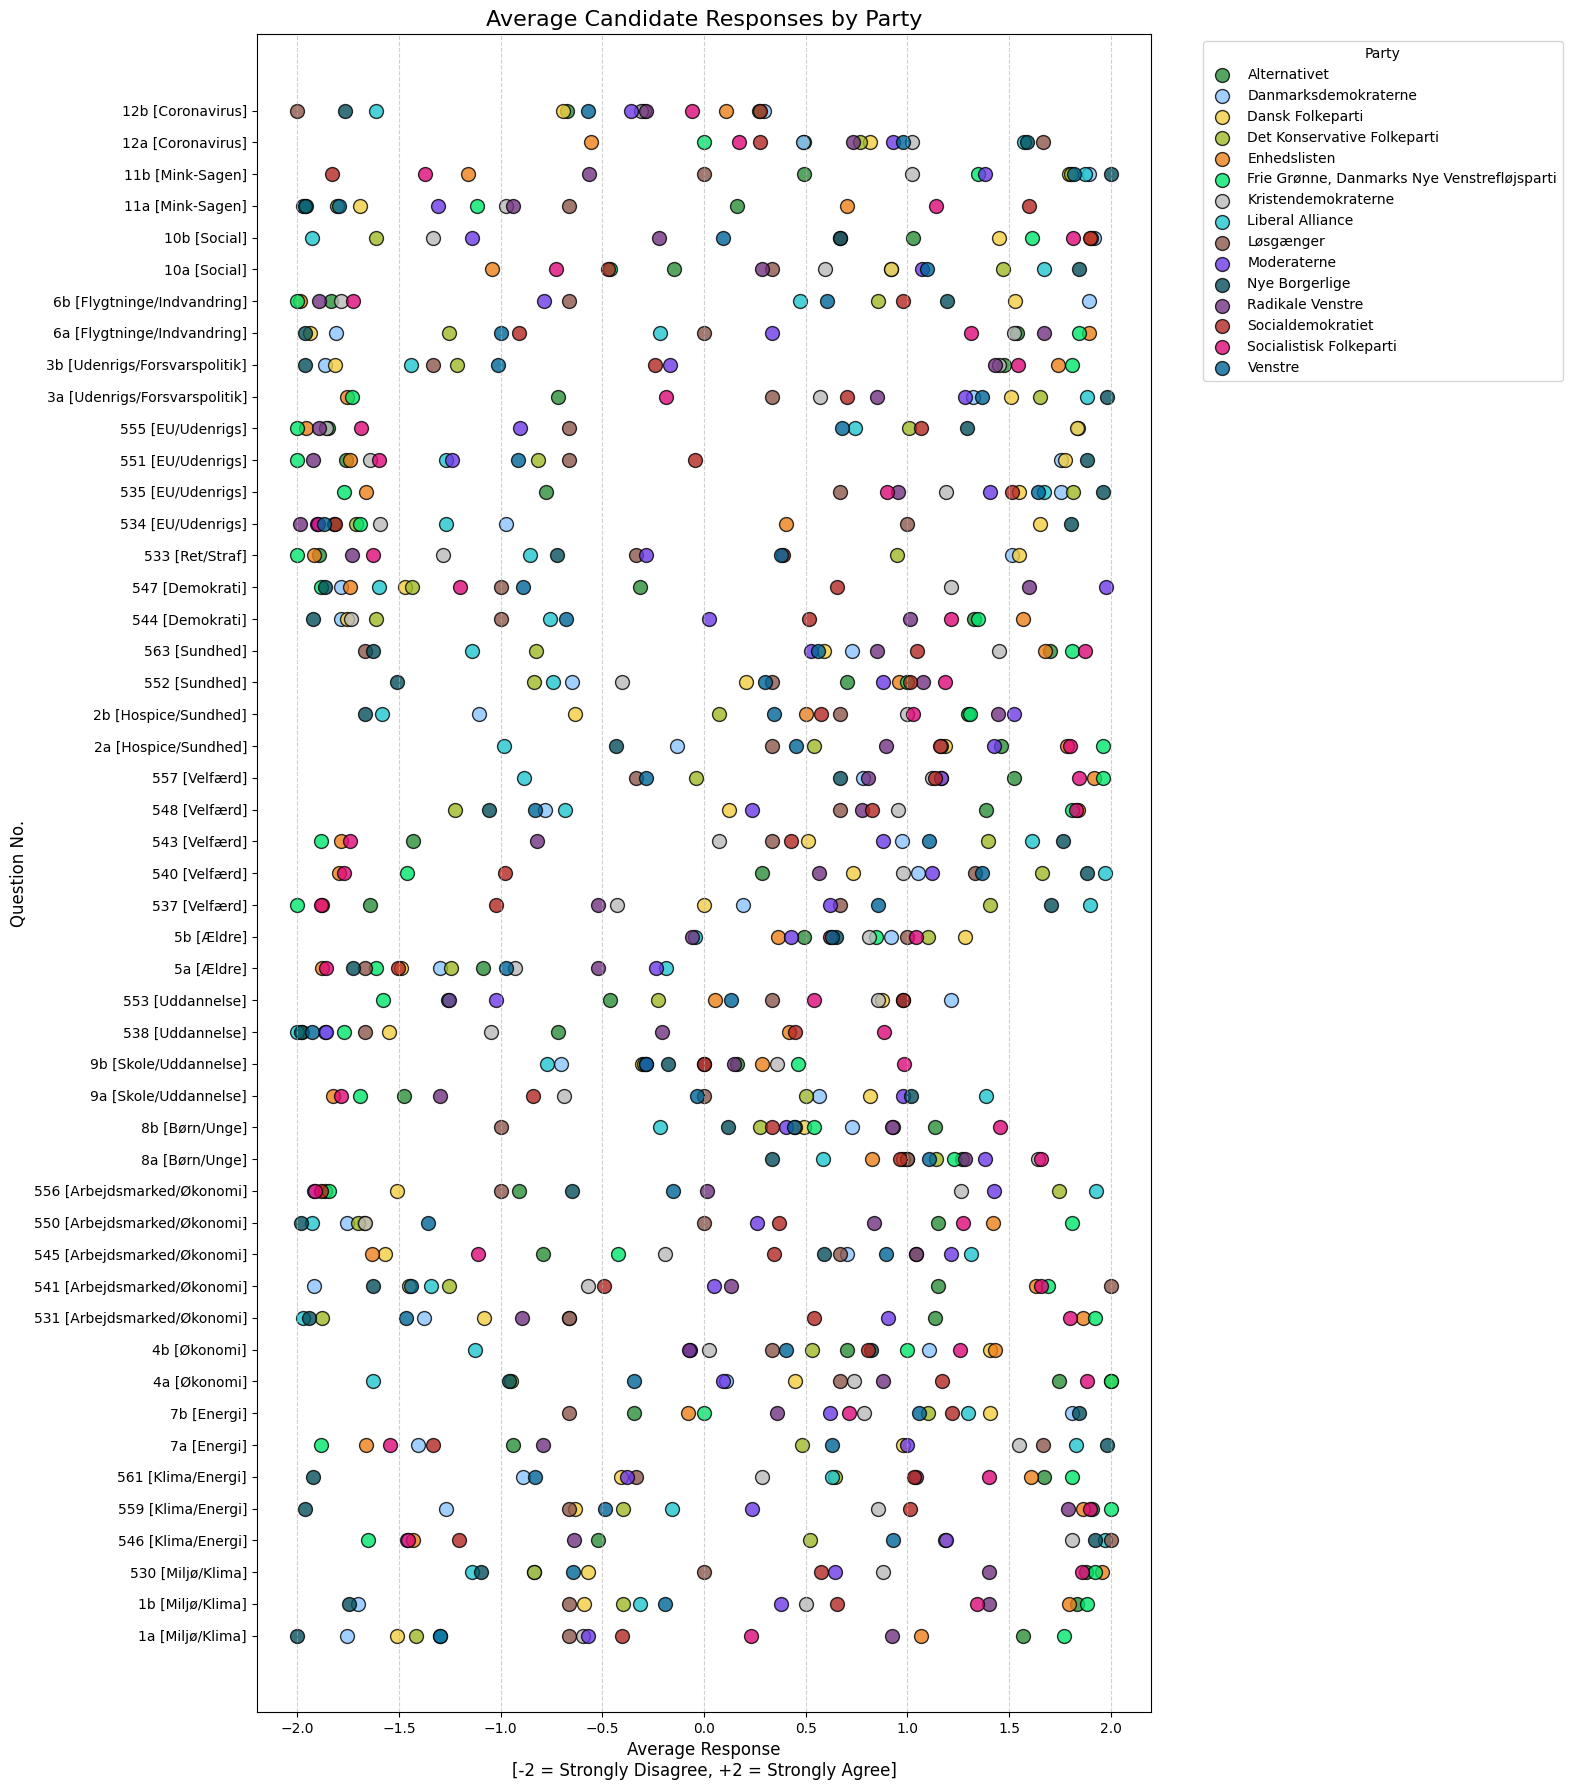

In [15]:
# Let's first prepare the data:
intra_party_response_data = raw_data
intra_party_response_data = intra_party_response_data.drop(columns=['storkreds', 'alder', 'navn'])

# Group the question answers by party and compute statistics:
intra_party_response_data_grouped_by_party = intra_party_response_data.groupby(['parti']).describe()

question_columns = ['1a', '1b', '530', '546', '559', '561', '7a', '7b', '4a', '4b', '531', '541', '545', '550', '556', '8a', '8b', '9a', '9b',
                    '538', '553', '5a', '5b', '537', '540', '543', '548', '557', '2a', '2b', '552', '563', '544', '547', '533', '534', '535',
                    '551', '555', '3a', '3b', '6a', '6b', '10a', '10b', '11a', '11b', '12a', '12b']

question_labels = ['1a [Miljø/Klima]', '1b [Miljø/Klima]', '530 [Miljø/Klima]', '546 [Klima/Energi]', '559 [Klima/Energi]', '561 [Klima/Energi]', '7a [Energi]', '7b [Energi]',
                   '4a [Økonomi]', '4b [Økonomi]', '531 [Arbejdsmarked/Økonomi]', '541 [Arbejdsmarked/Økonomi]', '545 [Arbejdsmarked/Økonomi]', '550 [Arbejdsmarked/Økonomi]',
                   '556 [Arbejdsmarked/Økonomi]', '8a [Børn/Unge]', '8b [Børn/Unge]', '9a [Skole/Uddannelse]', '9b [Skole/Uddannelse]', '538 [Uddannelse]', '553 [Uddannelse]',
                   '5a [Ældre]', '5b [Ældre]', '537 [Velfærd]', '540 [Velfærd]', '543 [Velfærd]', '548 [Velfærd]', '557 [Velfærd]', '2a [Hospice/Sundhed]', '2b [Hospice/Sundhed]',
                   '552 [Sundhed]', '563 [Sundhed]', '544 [Demokrati]', '547 [Demokrati]', '533 [Ret/Straf]', '534 [EU/Udenrigs]', '535 [EU/Udenrigs]', '551 [EU/Udenrigs]',
                   '555 [EU/Udenrigs]', '3a [Udenrigs/Forsvarspolitik]', '3b [Udenrigs/Forsvarspolitik]', '6a [Flygtninge/Indvandring]', '6b [Flygtninge/Indvandring]', '10a [Social]',
                   '10b [Social]', '11a [Mink-Sagen]', '11b [Mink-Sagen]', '12a [Coronavirus]', '12b [Coronavirus]']

# Calculate the mean responses per party for each question:
party_mean_reponses = intra_party_response_data.groupby('parti')[question_columns].mean().T

# Create a combined plot for easy visual comparison between parties
print("\nCandidate Average Responses visualized for each party:")
fig, ax = plt.subplots(figsize=(16, 18))
y_positions = np.arange(len(party_mean_reponses.index))

for i, party in enumerate(party_mean_reponses.columns):
    color = party_colors.get(party, "#7f7f7f")
    ax.scatter(party_mean_reponses[party], y_positions, label=party, color=color, s=100, edgecolor='black', alpha=0.8)

ax.set_yticks(y_positions)
ax.set_yticklabels(question_labels, fontsize=10)
ax.set_xlabel("Average Response\n[-2 = Strongly Disagree, +2 = Strongly Agree]", fontsize=12)
ax.set_title("Average Candidate Responses by Party", fontsize=16)
ax.set_ylabel("Question No.", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend(title="Party", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**

# An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.

# Conclusions

TBA